# Exploring Poisson Distributions with and without Truncation

In this code, we are exploring Poisson distributions with and without truncation using Python. We will generate random data points from Poisson distributions and fit Poisson probability mass functions to the data. Truncation involves setting values less than 1 to 1 in order to investigate the effects of truncation on the distribution.

## Importing Libraries

We start by importing the necessary libraries:
- `numpy` for numerical operations.
- `matplotlib.pyplot` for creating plots.
- `scipy.stats.poisson` for the Poisson distribution.
- `scipy.optimize.curve_fit` for fitting the Poisson probability mass function.

## Functions

### Truncated Poisson Function

The `truncated_poisson` function generates random data points from a Poisson distribution. If a `seed_value` is provided, it sets the random seed for reproducibility. The generated data is then truncated to have a minimum value of 1.

### Poisson Probability Mass Function Fit

The `poisson_fit` function calculates the Poisson probability mass function for a given set of data points and a lambda parameter.

### Plotting Function

The `plot_poisson_distribution` function takes data, color, alpha (transparency), and label as input. It creates a histogram of the data, fits a Poisson distribution using curve fitting, and plots the histogram and fitted curve on the same plot.

## Main Code

The main code starts by creating a figure with two subplots using `plt.figure` and `plt.subplot`.

### First Subplot

We set the mean degree (`mean_degree`), number of data points (`n`), and seed value for random number generation. Then, we generate two sets of data points: one with a random Poisson distribution and another with a truncated Poisson distribution. These data points are plotted using the `plot_poisson_distribution` function.

### Second Subplot

We repeat the process for a different mean degree, generating random and truncated Poisson data, and plotting them again.

Finally, we adjust the layout with `plt.tight_layout()` and display the plots using `plt.show()`.

This code demonstrates how to generate, visualize, and compare Poisson distributions with and without truncation using Python and relevant libraries.


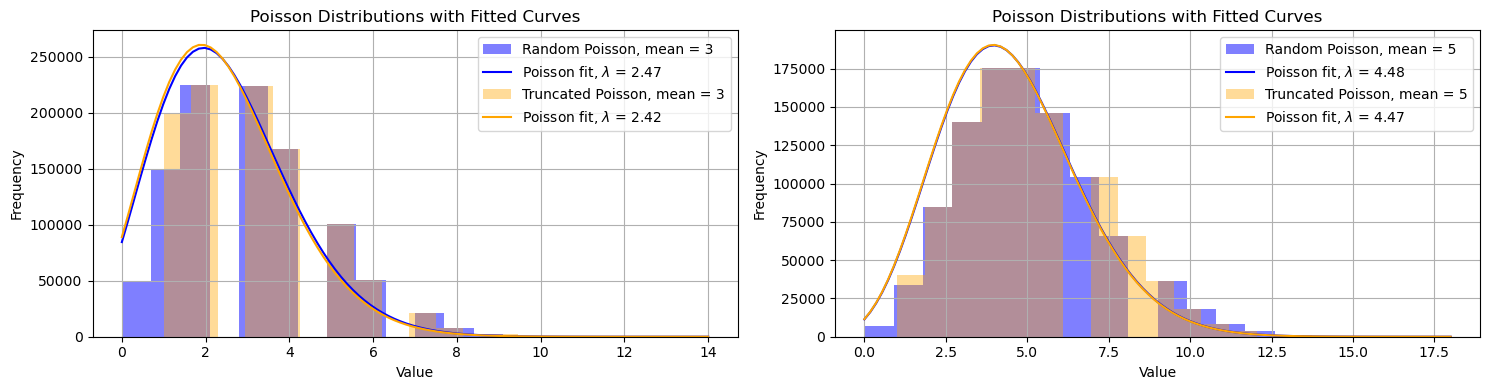

In [1]:
#Exploring Poisson Distributions with and without Truncation
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

def truncated_poisson(lambda_, n, seed_value=None):
    if seed_value is not None:
        np.random.seed(seed_value)
    x = np.random.poisson(lambda_, n)
    x[x < 1] = 1
    return x

def poisson_fit(x, lambda_):
    return poisson.pmf(x, lambda_)

def plot_poisson_distribution(data, color, alpha, label):
    hist, bins, _ = plt.hist(data, bins=20, color=color, alpha=alpha, label=label)
    popt, pcov = curve_fit(poisson_fit, data, np.ones_like(data) * np.mean(data))
    lambda_fit = popt[0]
    x = np.linspace(0, np.max(data), 100)
    y = poisson_fit(x, lambda_fit)
    plt.plot(x, y * np.sum(hist), color=color, label=f"Poisson fit, $\lambda$ = {lambda_fit:.2f}")


plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)    
mean_degree = 3
n = int(1e6)
seed_value = 500

np.random.seed(seed_value)

ind_deg_seq = np.random.poisson(mean_degree, n)
ind_deg_seq_truncated = truncated_poisson(mean_degree, n, seed_value)

plot_poisson_distribution(ind_deg_seq, 'blue', 0.5, f'Random Poisson, mean = {mean_degree}')
plot_poisson_distribution(ind_deg_seq_truncated, 'orange', 0.4, f'Truncated Poisson, mean = {mean_degree}')

plt.title('Poisson Distributions with Fitted Curves')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2) 
mean_degree = 5
n = int(1e6)
seed_value = 500

np.random.seed(seed_value)

ind_deg_seq = np.random.poisson(mean_degree, n)
ind_deg_seq_truncated = truncated_poisson(mean_degree, n, seed_value)

plot_poisson_distribution(ind_deg_seq, 'blue', 0.5, f'Random Poisson, mean = {mean_degree}')
plot_poisson_distribution(ind_deg_seq_truncated, 'orange', 0.4, f'Truncated Poisson, mean = {mean_degree}')

plt.title('Poisson Distributions with Fitted Curves')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
